## 2주차 미션 소개 - EDA를 통한 머신러닝에 영향을 미치는 주요 변수 확인하기

* EDA 를 통해 어떤 피처가 이탈에 영향을 미치는지 확인하고 피처를 변경해서 모델의 성능 개선해 보기
* EDA는 데이터의 구조, 패턴, 이상치, 변수 간 관계 등을 파악하는 데 도움을 줍니다. 모델링 전 데이터에 대한 이해를 가능하게 합니다. 고객 이탈에 영향을 미치는 중요 변수를 식별함으로써, 더 효과적인 피처 선택을 할 수 있습니다. 불필요하거나 적절하지 않은 피처를 제거함으로써, 모델이 특정 데이터에 과적합되는 것을 방지할 수 있습니다. EDA과정은 모델의 복잡성을 줄이고, 성능을 개선하기 위한 피처엔지니어링 전략을 세우는데 중요합니다.

* 미션 데이터셋 소개
    * 해당 Kaggle 데이터셋( https://www.kaggle.com/blastchar/telco-customer-churn )은 통신사 고객 이탈(Churn)에 대한 정보를 담고 있습니다. IBM에서 제공한 이 데이터셋은 고객 유지에 필요한 행동을 예측하는 데 사용될 수 있으며, 고객 데이터를 분석하여 고객 유지 프로그램을 개발하는 데 도움이 됩니다.
    * 해당 데이터셋은 다음의 정보로 구성되어 있습니다.
        * 고객 인구 통계 정보(Demographic info): 고객의 성별, 연령대, 배우자 및 부양 가족의 유무(Gender, SeniorCitizen, Partner, Dependents) 등에 관한 정보가 포함되어 있습니다.
        * 고객 이탈(Churn) 정보: 서비스를 중단 여부에 대한 정보가 포함되어 있습니다.
        * 서비스 가입 정보(Services subscribed): 고객들이 가입한 서비스들, 예를 들어 전화, 다중 라인, 인터넷, 온라인 보안, 온라인 백업, 장치 보호, 기술 지원, 스트리밍 TV 및 영화( honeService, MultipleLine, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies) 등에 대한 정보가 있습니다.
        * 고객 계정 정보(Customer account info): 고객이 얼마나 오래 서비스를 이용했는지, 계약 유형, 결제 방법, 무페이퍼 청구 여부, 월별 요금, 총 요금 (CustomerID, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Tenure)등의 정보가 담겨 있습니다.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from matplotlib import rcParams

# 원하는 warning 필터를 추가합니다.
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib.font_manager")


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
plt.rc('font', family='NanumBarunGothic')

In [ ]:
# 미션 수행을 위해 데이터셋을 로드합니다.
df = pd.read_csv("https://bit.ly/telco-csv", index_col="customerID")
df.shape

(7043, 20)

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# TotalCharges 가 수치 타입이 아니기 때문에 수치 연산을 위해 숫자 형태로 변경합니다.
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

## 미션 1 -  전체 수치 변수를 정답인 이탈 여부로 시각화하고 분석하기
데이터셋의 모든 수치형 변수를 이탈 여부에 따라 시각화하고 수치 구간에 따라 이탈률의 차이에 대해 분석해 주세요.
아래 이미지는 참고용으로 아래 이미지와 똑같이 시각화하지 않아도 됩니다. 이탈 여부를 잘 분석할 수 있는 시각화라면 어떤 시각화든 좋습니다.

<img src="https://i.imgur.com/oCQ9D0l.png">

In [ ]:
# 변수를 '수치형'과 '범주형'으로 분리
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(exclude=['int64', 'float64']).drop('Churn', axis=1).columns # 'Churn' 컬럼은 제외
numeric_cols, categorical_cols

(Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object'),
 Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
        'PaperlessBilling', 'PaymentMethod'],
       dtype='object'))

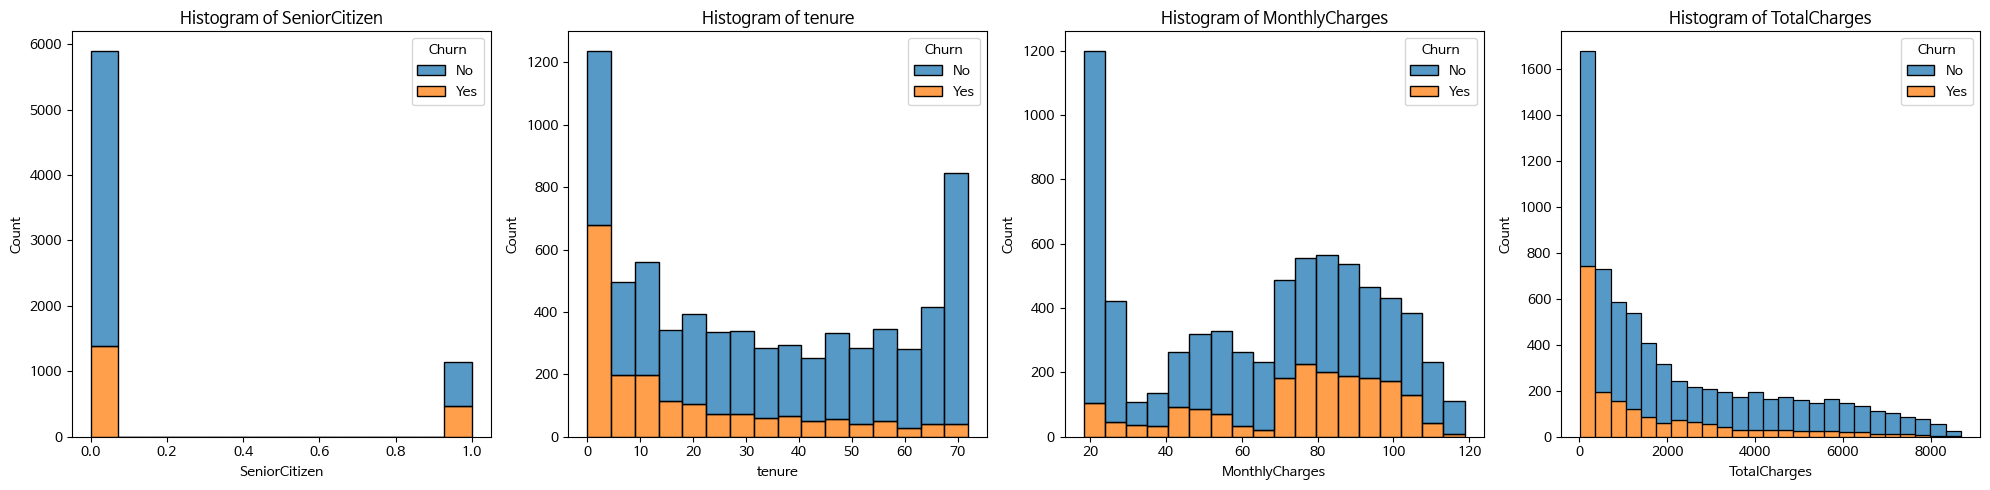

In [ ]:
# 위 예시처럼 수치 변수에 대한 히스토그램을 정답값으로 색상을 다르게 하여 히스토그램으로 시각화 해주세요.

plt.figure(figsize=(20, 5))

for i, col in enumerate(numeric_cols):
    plt.subplot(1, 4, i+1)
    sns.histplot(data=df, x=col, hue="Churn", multiple="stack")
    plt.title(f'Histogram of {col}')

plt.tight_layout()
plt.show()

<ipython-input-9-4d9a05423a56>:9: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


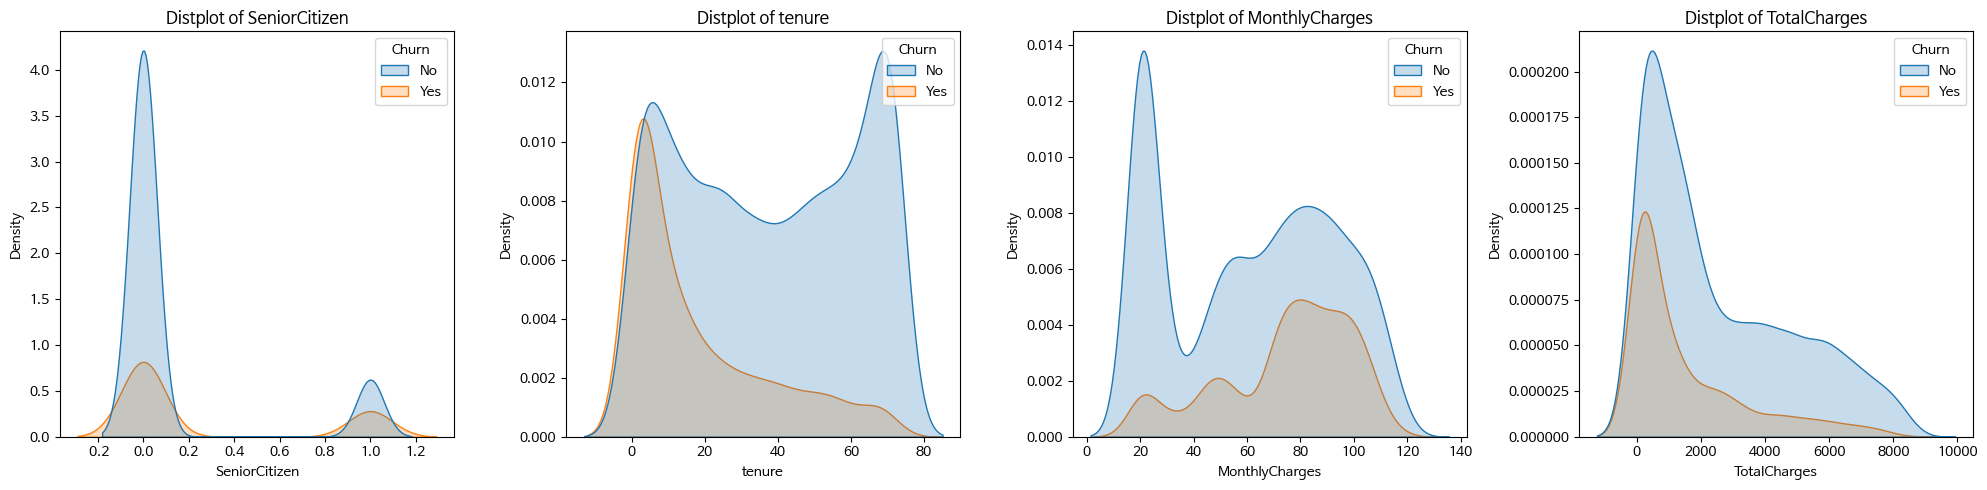

In [ ]:
# 분포도 (Distplot)
plt.figure(figsize=(20, 5))

for i, col in enumerate(numeric_cols):
    plt.subplot(1, 4, i+1)
    sns.kdeplot(data=df, x=col, hue="Churn", fill=True)
    plt.title(f'Distplot of {col}')

plt.tight_layout()
plt.show()

<ipython-input-22-2f06b14df648>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Churn", y=col, palette={'Yes': 'orange', 'No': 'blue'})
<ipython-input-22-2f06b14df648>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Churn", y=col, palette={'Yes': 'orange', 'No': 'blue'})
<ipython-input-22-2f06b14df648>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Churn", y=col, palette={'Yes': 'orange', 'No': 'blue'})
<ipython-input-22-2f06b14df648>:5: FutureWarning: 

Passing `palette` without assigning `hu

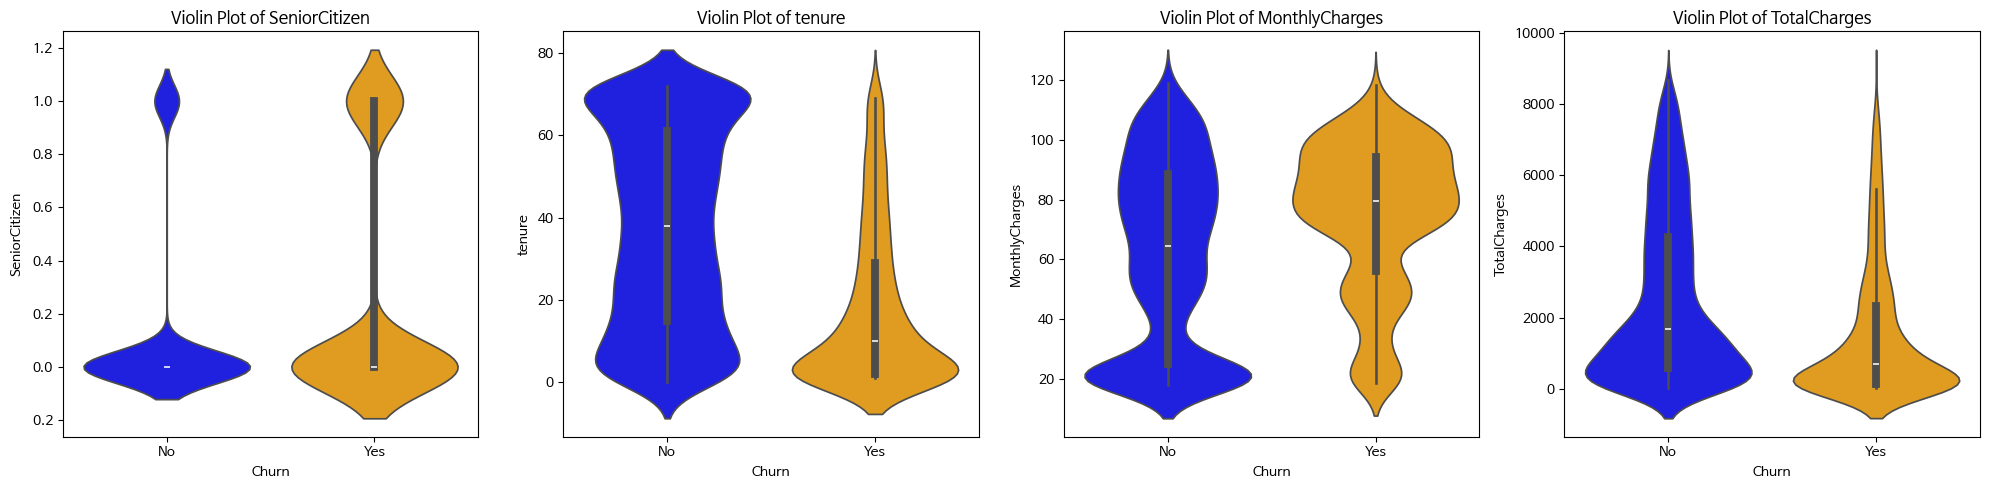

In [ ]:
plt.figure(figsize=(20, 5))

for i, col in enumerate(numeric_cols):
    plt.subplot(1, 4, i+1)
    sns.violinplot(data=df, x="Churn", y=col, palette={'Yes': 'orange', 'No': 'blue'})
    plt.title(f'Violin Plot of {col}')

plt.tight_layout()
plt.show()


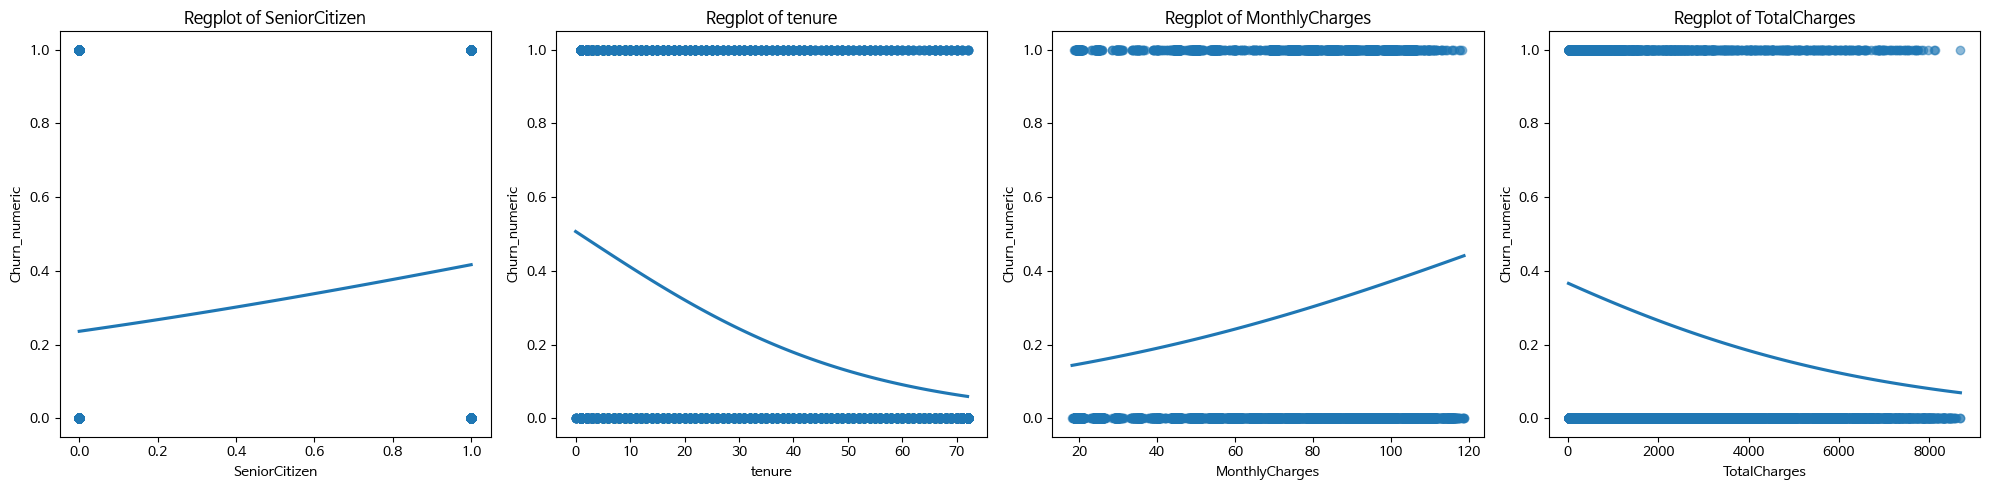

In [ ]:
# 'Churn' 컬럼을 숫자형으로 변환
df['Churn_numeric'] = df['Churn'].map({'Yes': 1, 'No': 0})

# 회귀 플롯 (Regplot)
plt.figure(figsize=(20, 5))

for i, col in enumerate(numeric_cols):
    plt.subplot(1, 4, i+1)
    sns.regplot(x=col, y='Churn_numeric', data=df, logistic=True, ci=None, scatter_kws={'alpha':0.5})
    plt.title(f'Regplot of {col}')

plt.tight_layout()
plt.show()


## 미션 2 - 주요 범주형 변수와 정답 값 비교하기

* 범주형 변수가 타겟 변수에 어떤 영향을 미치는지 이해함으로써, 해당 변수의 중요성을 파악할 수 있습니다. 이는 피처 선택 과정에서 중요한 지표가 됩니다. 범주형 변수와 정답 값 간의 관계를 분석함으로써 비즈니스 의사결정, 데이터 전략 수립, 모델 설계에 활용할 수 있습니다. 범주형 변수가 타겟 변수와 강한 관계를 보일 경우, 이는 모델의 예측 성능을 향상시킬 수 있는 중요한 피처임을 알아볼 수 있습니다. 범주형 변수와 정답 값 간의 비교를 통해 예상치 못한 패턴이나 이상치를 발견할 수 있습니다. 이는 데이터 전처리 과정에서 문제점을 해결하고 데이터의 품질을 개선하는 데 도움이 됩니다.
* 주요 범주형 변수와 타겟값인 이탈여부를 분석하는 시각화를 진행하고 그 과정에서 알게된 점을 정리해 주세요.

<img src="https://i.imgur.com/Q1KpQpP.png" width="500">

In [ ]:
nunique = df.nunique()
category_col = nunique[nunique < 5]
category_col

gender              2
SeniorCitizen       2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
Churn               2
Churn_numeric       2
dtype: int64

In [ ]:
categorical_cols

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [ ]:
# 다음의 코드를 실행하면 범주형 변수를 볼 수 있습니다.
# 위 예시처럼 시각화를 여기에 구현해 주세요.
category_col_name = category_col.index.tolist()
category_col_name

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn',
 'Churn_numeric']

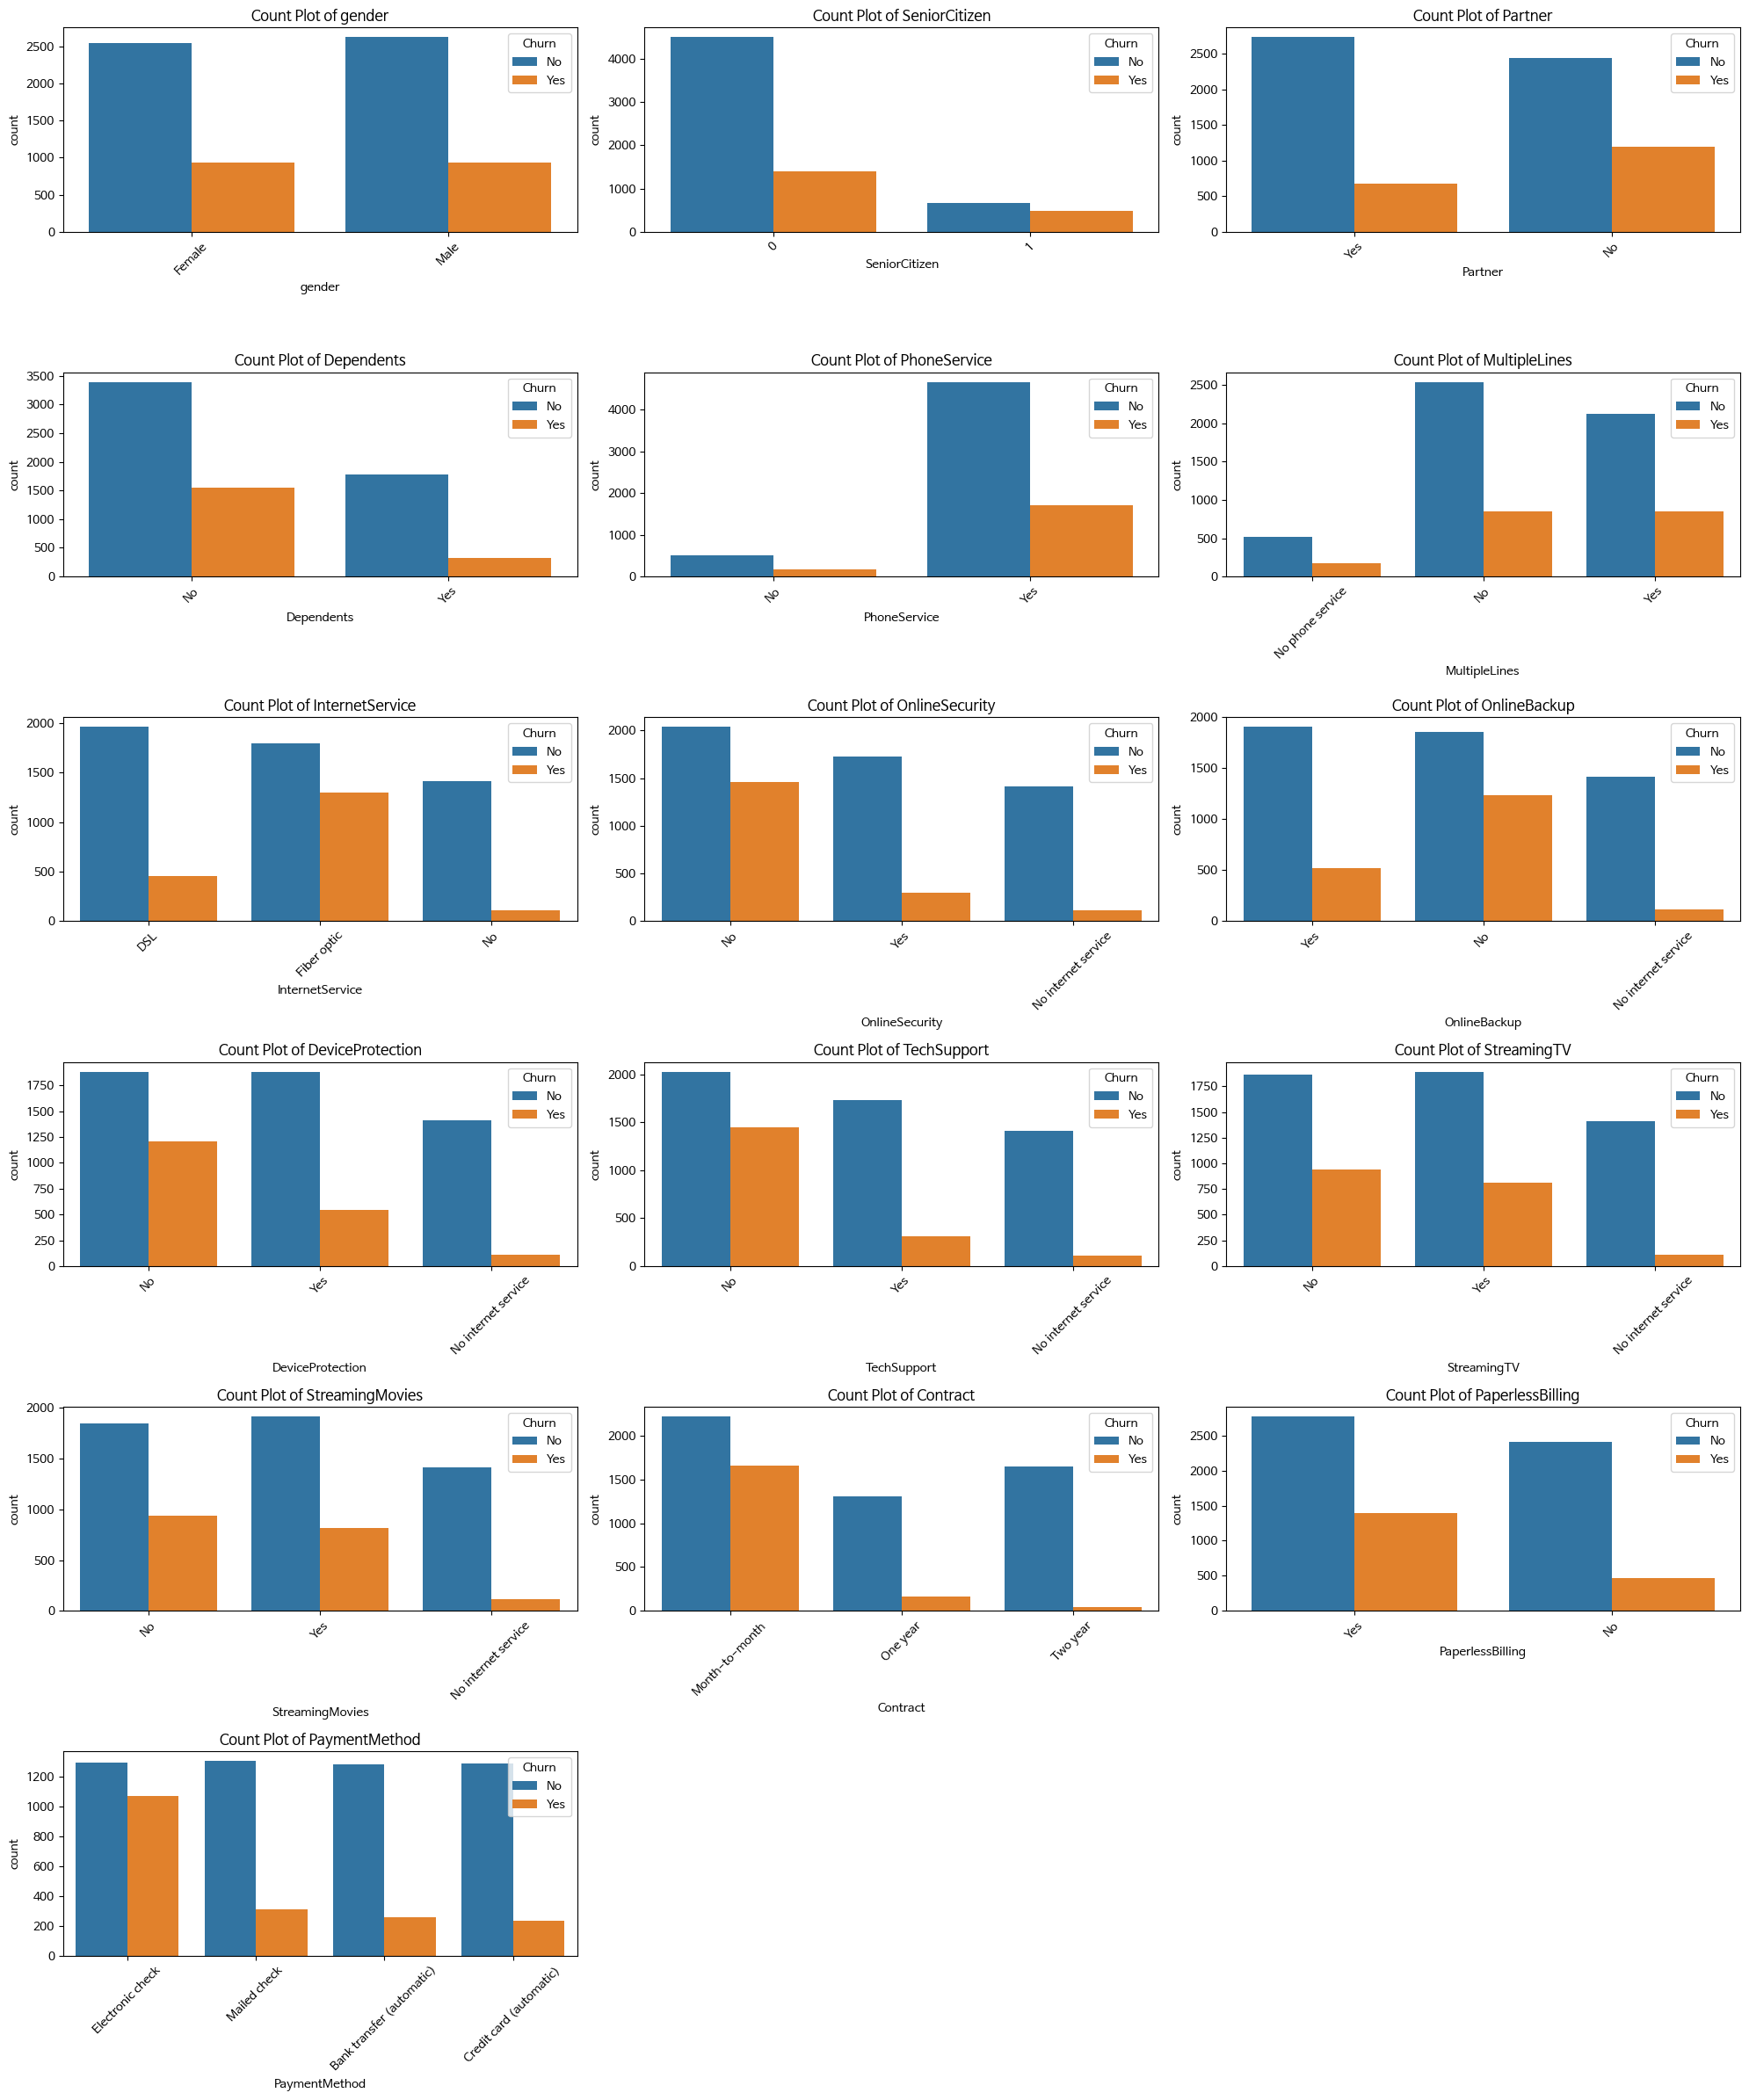

In [ ]:
# 카운트 플롯 (Count Plot)
plt.figure(figsize=(20, 24))

# 'Churn'과 'Churn_numeric'을 제외한 범주형 변수 선택
category_col_names = category_col.drop(['Churn', 'Churn_numeric']).index

# 각 범주형 변수에 대한 카운트 플롯 생성
for i, col in enumerate(category_col_names):
    plt.subplot(len(category_col_names) // 3 + 1, 3, i+1)
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## 미션 3 - 수치변수 간의 관계를 파악하기 위해 그래프를 시각화 하고 상관계수를 구해주세요.


상관계수를 통해 변수들 간의 선형적 관계를 파악합니다. 높은 상관관계를 보이는 변수들을 식별하여, 중복되거나 불필요한 특징을 제거함으로써 모델의 성능을 최적화할 수 있습니다. 강한 상관관계를 가진 변수들을 식별하여, 다중공선성 문제를 방지합니다. 상관 행렬을 시각화하여 데이터의 패턴과 특성을 더 잘 이해하고, 피처엔지니어링에 어떻게 활용할지 시각화 결과를 해석해 보세요. 또, 아래 예시와 똑같이 구해도 되지만 다른 변수를 추가하거나 여러분만의 인사이트를 추가해서 구해도 좋습니다.


|                |   SeniorCitizen |    tenure |   MonthlyCharges |
|:---------------|----------------:|----------:|-----------------:|
| SeniorCitizen  |       1         | 0.0165669 |         0.220173 |
| tenure         |       0.0165669 | 1         |         0.2479   |
| MonthlyCharges |       0.220173  | 0.2479    |         1        |




<table>
    <tr>
        <td><img src="https://i.imgur.com/RTfJDJN.png" width="300"></td>
        <td><img src="https://i.imgur.com/41Y04lj.png" width="300"></td>
    </tr>
</table>

In [ ]:
# 여기에 상관계수를 구하고 heatmap 으로 시각화 해주세요.
correlation_matrix = df[['SeniorCitizen', 'tenure', 'MonthlyCharges']].corr()
correlation_matrix

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


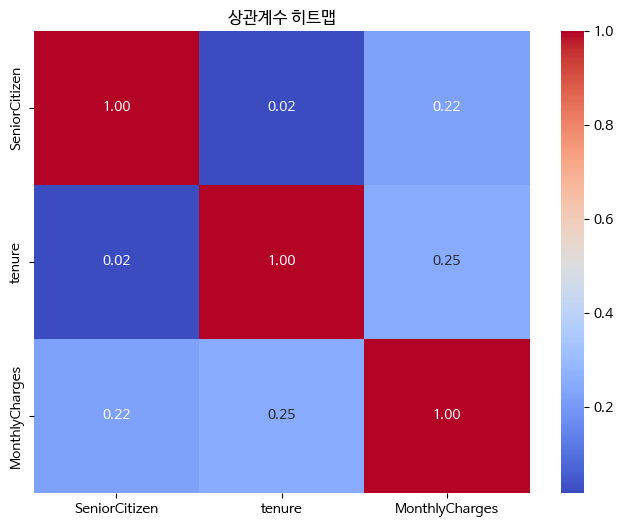

In [ ]:
# 상관계수 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('상관계수 히트맵')
plt.show()


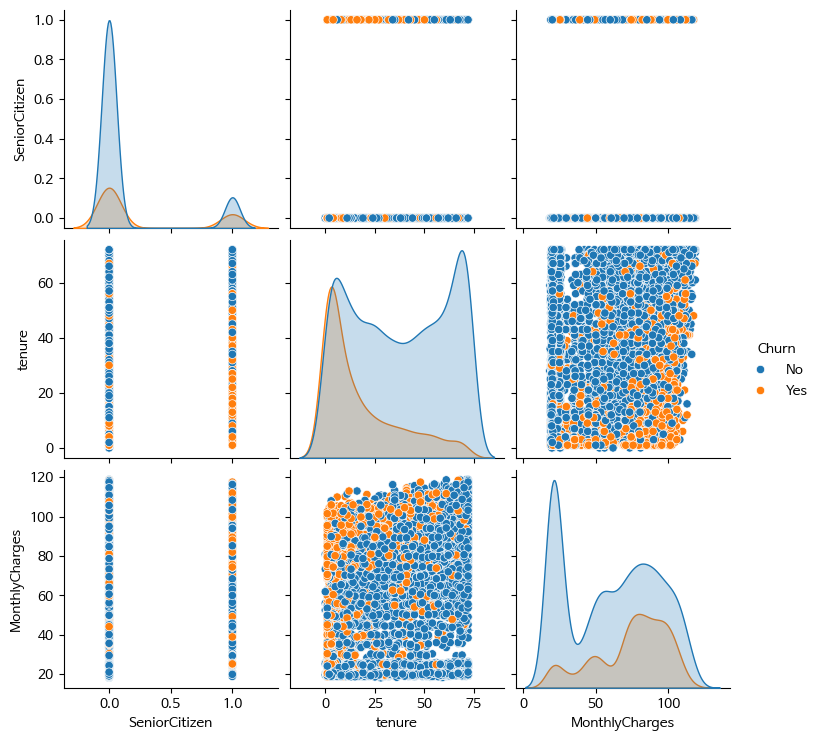

In [ ]:
# seaborn 의 pairplot 으로 이탈여부(Churn)에 따라 시각화 해주세요.
# 수치형 변수들의 상관계수 계산

# Pairplot을 그리기
sns.pairplot(df[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'Churn']], hue='Churn')

# 상관계수와 pairplot을 출력
plt.show()


## 상관관계 변수 추가

In [ ]:
selected_columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
                    'Contract', 'PaymentMethod']
# TotalCharges 컬럼의 결측치를 처리 (0으로 대체)
df['TotalCharges'] = df['TotalCharges'].fillna(0)

# Contract와 PaymentMethod는 범주형 변수이므로, 이를 더미 변수로 변환
df_dummy = pd.get_dummies(df[selected_columns], drop_first=True)



/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


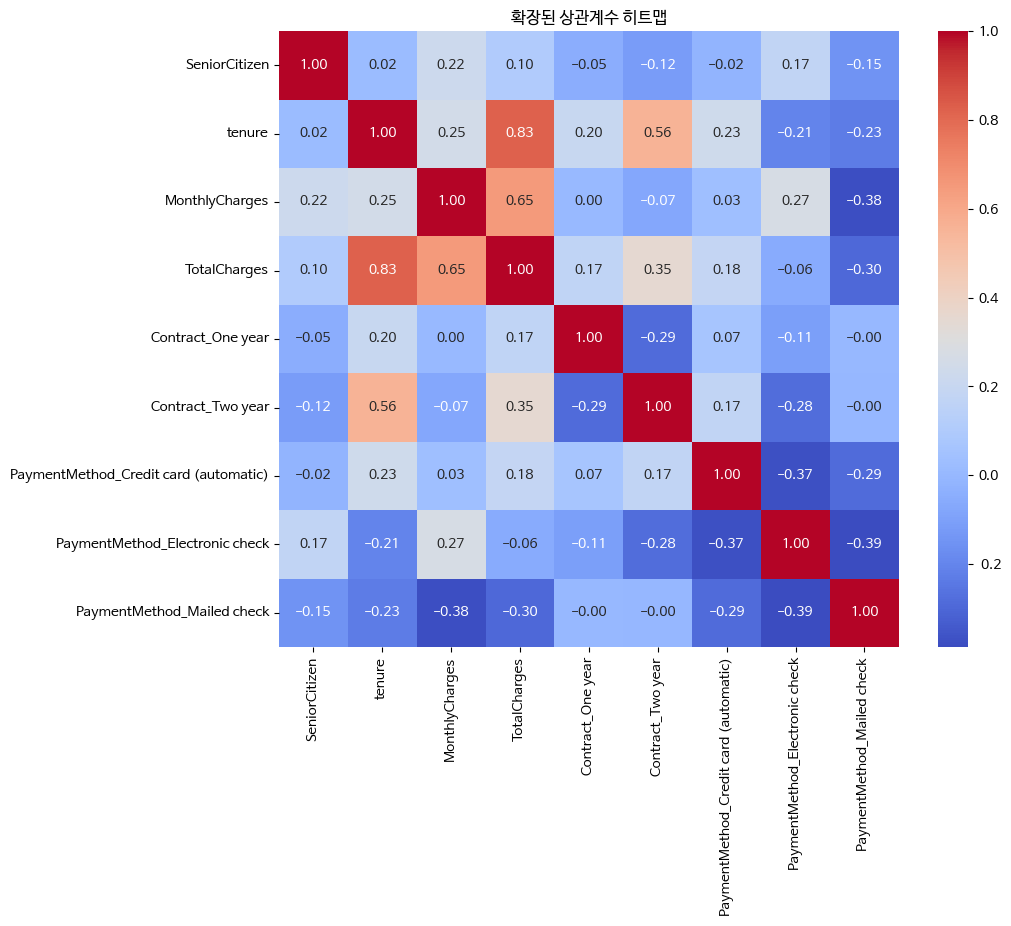

In [ ]:
# 상관계수 계산
correlation_matrix_extended = df_dummy.corr()

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_extended, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('확장된 상관계수 히트맵')
plt.show()



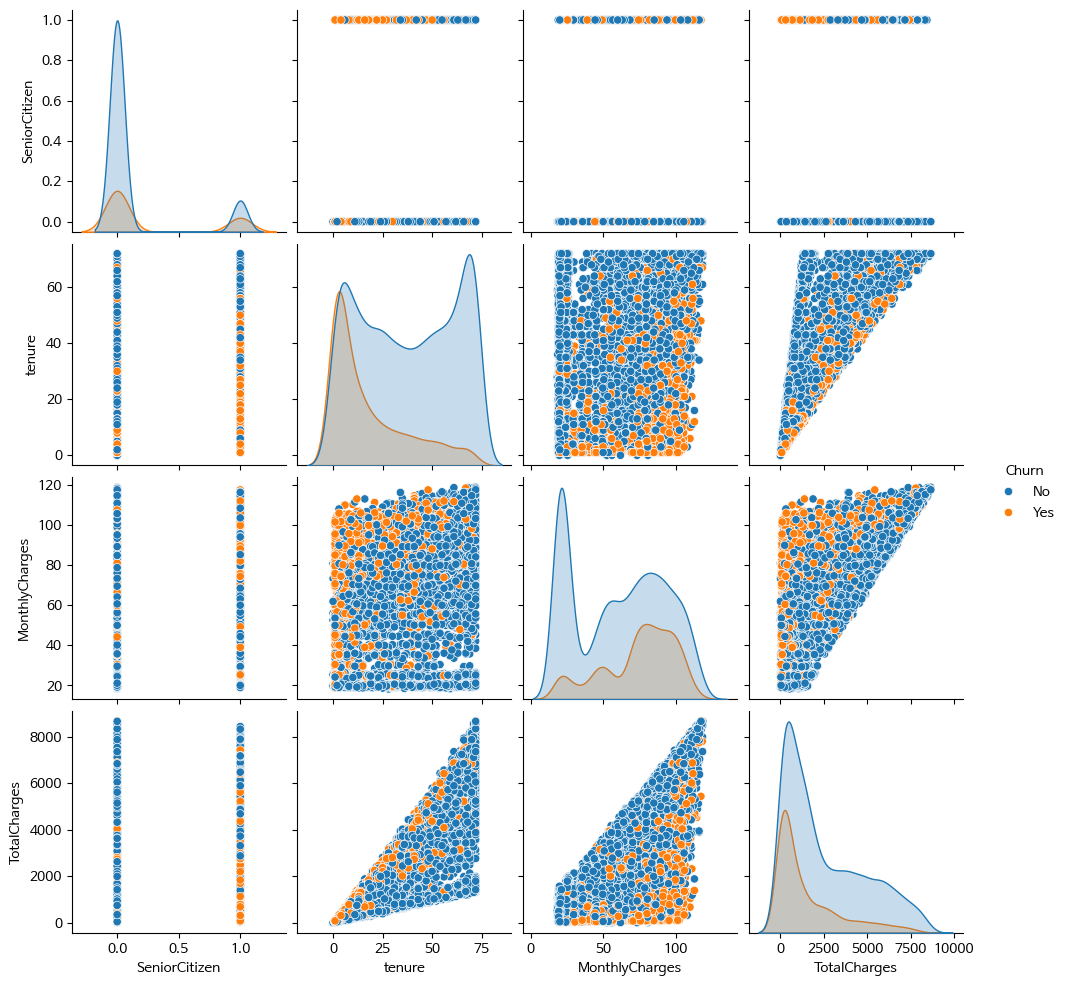

In [ ]:
# Pairplot을 그리기
sns.pairplot(df[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue='Churn')
plt.show()
